In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [37]:
data = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [11]:
# return unique values from an numpy array 
# np.unique(data['City'].values)

In [38]:
# Extrating year and month from data
# pd.to_datetime converts arguement to datetime 
# DatetimeIndex creates timestamp objects - split to date time format and generate datetime format 

# type(data['month'].iloc[0])

# year month columns are created to be filled with numpy inte64 values, while city column has str values 
data['year'] = pd.DatetimeIndex(pd.to_datetime(data['dt'])).year
data['month'] = pd.DatetimeIndex(pd.to_datetime(data['dt'])).month

In [42]:
# only consider Los Angeles in October across years 
data = data[data['City'] == 'Los Angeles']
data = data[data['month'] == 10]
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month
131855,1849-10-01,16.549,2.177,Los Angeles,United States,34.56N,118.70W,1849,10
131867,1850-10-01,17.577,1.318,Los Angeles,United States,34.56N,118.70W,1850,10
131879,1851-10-01,16.963,2.856,Los Angeles,United States,34.56N,118.70W,1851,10
131891,1852-10-01,15.792,1.630,Los Angeles,United States,34.56N,118.70W,1852,10
131903,1853-10-01,17.851,3.069,Los Angeles,United States,34.56N,118.70W,1853,10


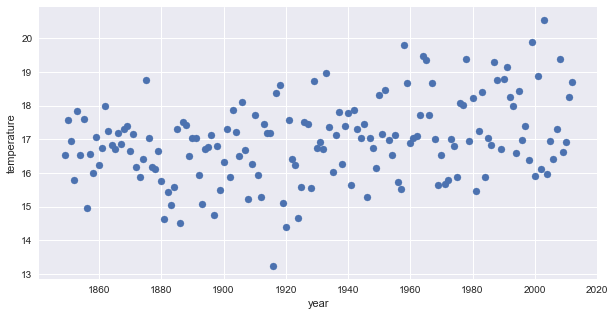

In [49]:
# a linear trend can be seen from the plot 
figure = plt.figure(figsize = (10,5))
plt.scatter(x = data['year'], y = data['AverageTemperature'])
plt.ylabel('temperature')
plt.xlabel('year')
plt.show()

### SIMPLE  linear regression, regularization and gradient descent 

Regularization is like adding a penalty term with regularization term lambda to the cost function and gradinet descent follows as usual.
The goal is to find the weights that minimizes the regularized cost function 

$$
E(m,b) =  \frac{1}{2N} \sum_{i=1}^n\big(y_i - (m x_i + b )\big)^2
$$

Regularization is a very important technique in machine learning to prevent overfitting and ensure that the model generalizes well to new data. Generally, there are two forms of regularization - L1 and L2. 

####  With L1 Regularization:

$$
E(m,b) =  \frac{1}{2N} \big(\sum_{i=1}^n\big(y_i - (m x_i + b )\big)^2 + \lambda \parallel m \parallel\big)
$$

$$
\frac{d}{db} = \frac{1}{N} \sum_{i=1}^n -\big(y_i - (m x_i + b )\big)
$$

$$
\frac{d}{dm} = \frac{\lambda}{2N} + \frac{1}{N} \sum_{i=1}^n -x_i\big(y_i - (m x_i + b )\big)
$$


#### With L2 Regularization:

$$
E(m,b) =  \frac{1}{2N} \big(\sum_{i=1}^n\big(y_i - (m x_i + b )\big)^2 + \lambda \parallel m \parallel^2\big)
$$

$$
\frac{d}{db} = \frac{1}{N} \sum_{i=1}^n -\big(y_i - (m x_i + b )\big)
$$

$$
\frac{d}{dm} = \frac{\lambda}{N} m + \frac{1}{N} \sum_{i=1}^n -x_i\big(y_i - (m x_i + b )\big)
$$


The partial derivative with respect to the intercept b does not vary with regularization.

In [57]:
# as_matrix: Convert the data frame to its Numpy-array representation.
points = data.as_matrix(['year', 'AverageTemperature'])

In [80]:
# compute sum of squared error givne a line for all data points
# points are x = data['year'], y = data['AverageTemperature']

def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        y = points[:,1][i]
        x = points[:,0][i]
        totalError += (y - (m * x + b)) ** 2
    # return mean squared error      
    return totalError / float(len(points))

In [127]:
# compute the gradient at each iteration step 
# lam as the srength of the penalty 
# regularizer as the choice of L1, L2 ...norm or no regularization at all

def step_gradient(b_current, m_current, points, learningRate, lam, regularizer):
    m_gradient = 0
    b_gradient = 0

    N = len(points)

    for i in range(len(points)):
        y = points[:,1][i]
        x = points[:,0][i]
        # gradient according to different regularization imposed 
        if regularizer == 'L1':
            m_gradient += lam/(2 * N) - (x/N) * (y - (m_current * x + b_current))

        elif regularizer == 'L2':
            m_gradient += m_current * lam/N - (x/N) * (y - (m_current * x + b_current))
        
        else: # no regularization
            m_gradient += -(x/N) * (y - (m_current * x + b_current))
        
        b_gradient += -(1/N) * (y - (m_current * x + b_current))
        
        # after looping over all the data points, update the coefficients 
        new_b = b_current - learningRate * b_gradient
        new_m = m_current - learningRate * m_gradient

    return new_b, new_m 

In [128]:
b_current = 0
m_current = 0
learningRate = 0.0001 
lam = 0.01
regularizer = 'L1'

(b, m) = step_gradient(b_current, m_current, points, learningRate, lam, regularizer)

In [130]:
m

3.2788536067073171

In [188]:
# gradient descent optimization runner  
def gradient_descent_runner(points, starting_b, starting_m, learningRate, num_iterations, lam, regularizer):
    b = starting_b
    m = starting_m
    
    b_list = [starting_b]
    m_list = [starting_m]
    for i in range(num_iterations):
        new_b, new_m = step_gradient(b, m, points, learningRate, lam, regularizer)
        b = new_b
        m = new_m
                        
        b_list.append(new_b)
        m_list.append(new_m)
        
        # Every 100 iterations, prints b and m and error
        if i % 100 == 0:
            print('Iteration {}, b:{}, m:{}, error:{}'.format(i, b, m, compute_error_for_line_given_points(b, m, points)))
    return b_list, m_list

In [193]:
# runner function with gradient descent related parameters
def run(regularizer, learningRate, num_iterations, lam):
    starting_b = 0
    starting_m  = 0
    b_list, m_list = gradient_descent_runner(points, starting_b, starting_m, learningRate, num_iterations, lam, regularizer)
    
    print ('After {} iterations, b = {}, m = {}, error = {}'.format(num_iterations, b_list[-1], m_list[-1], compute_error_for_line_given_points(b_list[-1], m_list[-1], points)))
    
    return b_list, m_list

In [210]:
# Hyperparameters
learningRate = 0.0000001
num_iterations = 500
lam = 500
# run(regularizer, learningRate, num_iterations, lam)

b, m = run(' ', learningRate, num_iterations, lam)
print (b[-1], m[-1])

# b1, m1 = gradient_descent_runner(points, starting_b, starting_m, learningRate, num_iterations, lam, regularizer)
b1, m1 = run('L1', learningRate, num_iterations, lam)

print (b1[-1], m1[-1])

# b2, m2 = gradient_descent_runner(points, starting_b, starting_m, learningRate, num_iterations, lam, regularizer)
b2, m2 = run('L2', learningRate, num_iterations, lam)

print (b2[-1], m2[-1])

Iteration 0, b:1.6974890243902432e-06, m:0.0032788536067073167, error:114.66922021674188
Iteration 100, b:4.558132635971237e-06, m:0.008792678624670747, error:1.2969344149948159
Iteration 200, b:4.564328644382075e-06, m:0.00879267862146314, error:1.2969344149871374
Iteration 300, b:4.5705246527556734e-06, m:0.008792678618255534, error:1.2969344149794586
Iteration 400, b:4.576720661092033e-06, m:0.008792678615047927, error:1.2969344149717805
After 500 iterations, b = 4.582854709308345e-06, m = 0.008792678611872396, error = 1.29693441496418
4.58285470931e-06 0.00879267861187
Iteration 0, b:1.6974890243902432e-06, m:0.003253853606707318, error:115.69962354906068
Iteration 100, b:5.830591196204104e-06, m:0.008725637166902842, error:1.3136946086406749
Iteration 200, b:7.131009818388362e-06, m:0.00872563649369018, error:1.3136946070291962
Iteration 300, b:8.431428432756832e-06, m:0.008725635820477522, error:1.3136946054177188
Iteration 400, b:9.731847039309517e-06, m:0.008725635147264868, er

#### prediction with gradient descent result 

In [203]:
# predict y given x

def predict(b, m, years):
    predicted_y = list()
    for x in years:
        y = m * x + b
        predicted_y.append(y)
    return predicted_y

In [214]:
learningRate = 0.0000001
num_iterations = 500
lam = 500
regularizer = 'L1'

predict(b[-1], m[-1], [2050, 2100])

[18.024995737193123, 18.464629667786742]

#### visualization 

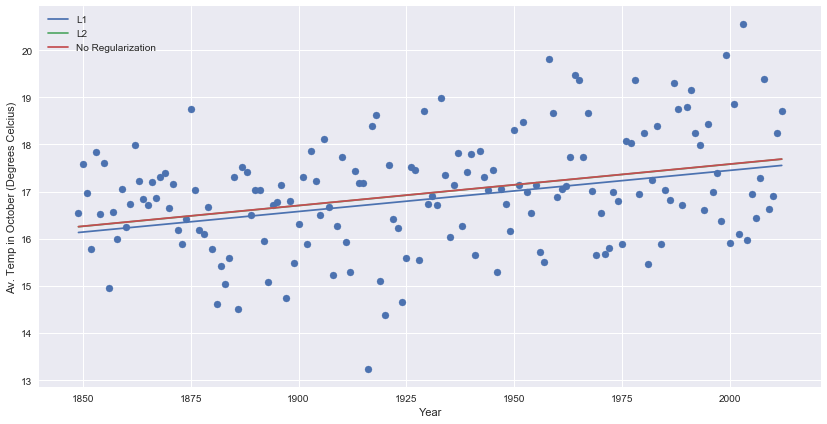

In [213]:
# fitted line under different regularization and training data points 

fig, ax = plt.subplots(figsize=(14, 7))
ax.set_xlabel('Year')
ax.set_ylabel('Av. Temp in October (Degrees Celcius)')

plt.plot(points[:,0], predict(b1[-1], m1[-1], points[:,0]), label='L1')
plt.plot(points[:,0], predict(b2[-1], m2[-1], points[:,0]), label='L2')
plt.plot(points[:,0], predict(b[-1], m[-1], points[:,0]), label='No Regularization')

plt.scatter(points[:,0], points[:,1])
plt.legend()
plt.show()

# L2 and No Regularization fitted lines almost overlap